<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/max_pred/candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!pip install gplearn

In [8]:
#!pip install causalml

In [9]:
import pandas as pd
import numpy as np

import causalml

In [10]:
#!pip show causalml

In [11]:
rare_flag           = False


error_cutoff        = True
candy_pred_error_cuttoff_quantile_cutoff_threshold = 0.5

scale_sugar_price   = False

control_variables_df = pd.DataFrame ()

In [12]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [13]:
if rare_flag :
  #rare_cols  = ["peanutyalmondy" , "nougat" , "bar" , "hard" , "caramel" , 'crispedricewafer']
  rare_cols  = [ "peanutyalmondy" ]
  data ["rare"] = 0
  for r in rare_cols : data ["rare"] = data ["rare"] + data [r]
  data ["rare"] = np.where (data ["rare"] >= 1 , 1 , 0)
else:
  rare_cols  = []

In [14]:
data ["peanutyalmondy"].value_counts()

0    71
1    14
Name: peanutyalmondy, dtype: int64

array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>],
       [<Axes: title={'center': 'peanutyalmondy'}>,
        <Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>],
       [<Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>,
        <Axes: title={'center': 'pluribus'}>],
       [<Axes: title={'center': 'sugarpercent'}>,
        <Axes: title={'center': 'pricepercent'}>,
        <Axes: title={'center': 'winpercent'}>]], dtype=object)

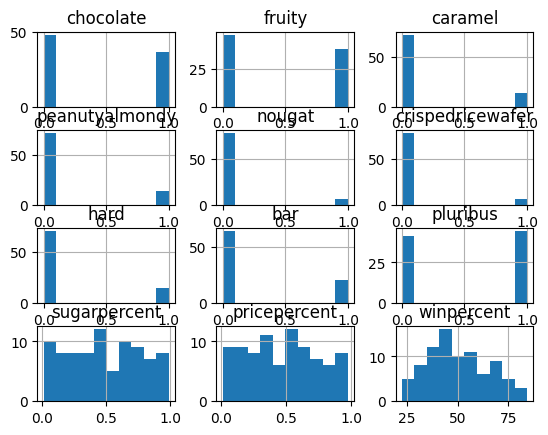

In [15]:
data.hist()

array([[<Axes: title={'center': 'winpercent'}>,
        <Axes: title={'center': 'sugarpercent'}>],
       [<Axes: title={'center': 'pricepercent'}>, <Axes: >]], dtype=object)

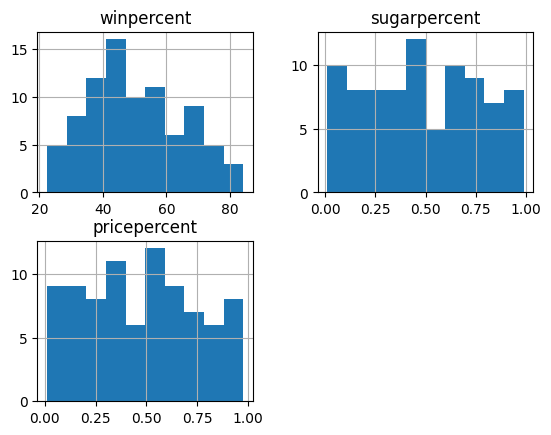

In [16]:
data[["winpercent" , "sugarpercent" , "pricepercent"]].hist()

In [17]:
if scale_sugar_price :
  data ["sugarpercent"] = data ["sugarpercent"] * 100
  data ["pricepercent"] = data ["pricepercent"] * 100

In [18]:
y_col            = "winpercent"
non_feature_cols = ["competitorname",
                    "pricepercent" ,
                    "sugarpercent" ,
                    "fruity",
                    y_col
                    ]
non_feature_cols = ["competitorname",
                   "pricepercent" ,
                    "sugarpercent" ,

                    y_col
                    ]
for r in rare_cols :      non_feature_cols.append (r)
X                = data.drop (non_feature_cols,axis =1)
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0
81,0,1,0,0,0,0,1,0,0
82,0,1,0,0,0,0,0,0,1
83,0,0,1,0,0,0,1,0,0


In [19]:
X.corr ()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000


array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>],
       [<Axes: title={'center': 'peanutyalmondy'}>,
        <Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>],
       [<Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>,
        <Axes: title={'center': 'pluribus'}>]], dtype=object)

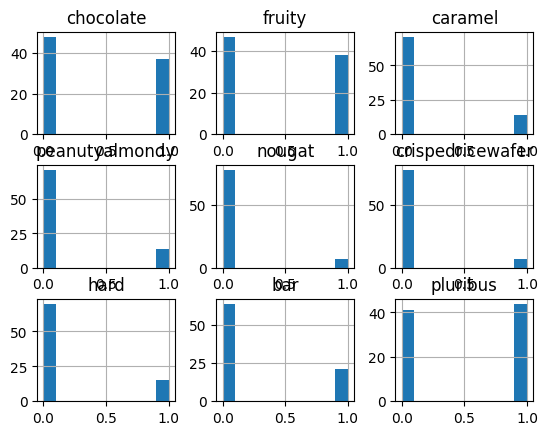

In [20]:
X.hist ()

In [21]:
y = data [y_col]
y

0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

<Axes: >

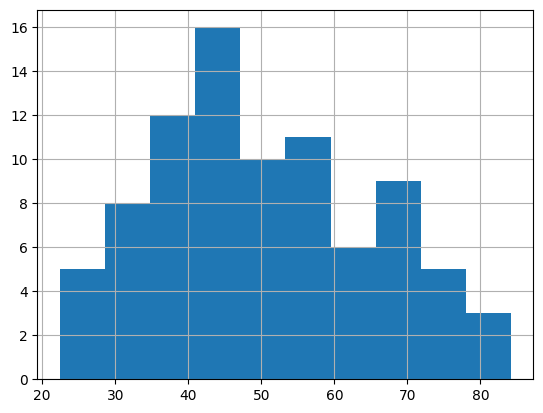

In [22]:
y.hist()

In [23]:
X.join (y).to_csv ("ATE_pp.csv")

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 10), #20
    "min_samples_split": randint(2, 100), #11
    "min_samples_leaf": randint(1, 100) #11
}


# Setup the Randomized Search with cross-validation for the entire dataset
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs = -1 , verbose = 40)

# Perform the search on the entire dataset
random_search.fit(X, y)
best_params = random_search.best_params_


y_pred = random_search.predict (X)

# Calculate R^2 and RMSE
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Prediction R^2: 0.6410305194025034, RMSE: 8.763957128160895


In [25]:
best_params

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

In [26]:
candy_pred                      = X.join (y).join (pd.DataFrame (y_pred,columns = ["y_pred"]))
candy_pred ["error"]            = candy_pred [y_col] - candy_pred ["y_pred"]
candy_pred ["abs_error"]        = abs (candy_pred [y_col] - candy_pred ["y_pred"])
candy_pred ["error_squared"]    = candy_pred ["error"] ** 2
candy_pred

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,winpercent,y_pred,error,abs_error,error_squared
0,1,0,1,0,0,1,0,1,0,66.971725,68.707155,-1.735430,1.735430,3.011718
1,1,0,0,0,1,0,0,1,0,67.602936,54.524951,13.077985,13.077985,171.033700
2,0,0,0,0,0,0,0,0,0,32.261086,38.531280,-6.270194,6.270194,39.315328
3,0,0,0,0,0,0,0,0,0,46.116505,38.531280,7.585225,7.585225,57.535644
4,0,1,0,0,0,0,0,0,0,52.341465,42.706849,9.634616,9.634616,92.825816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,45.466282,42.706849,2.759433,2.759433,7.614468
81,0,1,0,0,0,0,1,0,0,39.011898,38.800385,0.211513,0.211513,0.044738
82,0,1,0,0,0,0,0,0,1,44.375519,46.604024,-2.228505,2.228505,4.966234
83,0,0,1,0,0,0,1,0,0,41.904308,38.081201,3.823107,3.823107,14.616148


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='winpercent', ylabel='y_pred'>

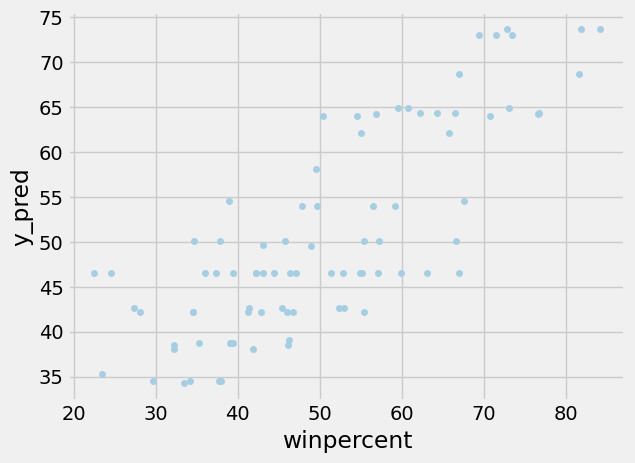

In [27]:
candy_pred.plot.scatter (y_col,"y_pred")

<Axes: xlabel='winpercent', ylabel='error_squared'>

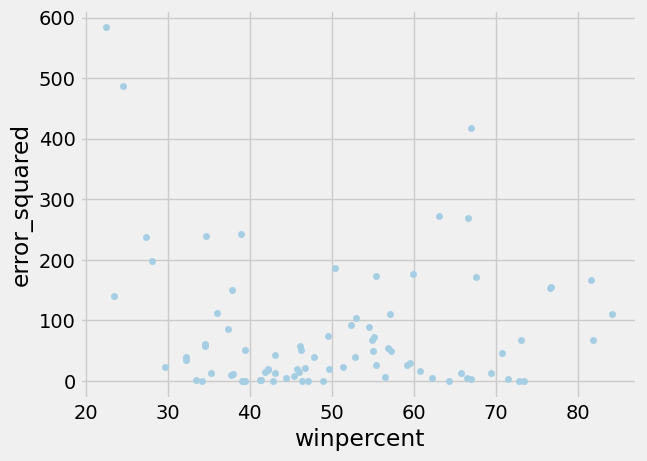

In [28]:
candy_pred.plot.scatter (y_col,"error_squared")

<Axes: >

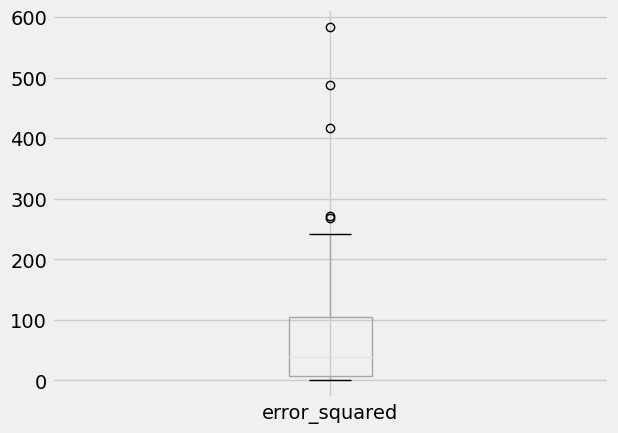

In [29]:
candy_pred [['error_squared',]].boxplot ()

In [30]:
candy_pred ['error_squared'].quantile (0.5)

38.71232783958102

In [31]:

error_cut_off_index = candy_pred.index
if error_cutoff :

  candy_pred_error_cuttoff_quantile_cutoff_threshold_value = candy_pred ['error_squared'].quantile (candy_pred_error_cuttoff_quantile_cutoff_threshold)
  candy_pred_error_cuttoff_condition =  candy_pred ["error_squared"] <= candy_pred_error_cuttoff_quantile_cutoff_threshold_value
  print (candy_pred [candy_pred_error_cuttoff_condition].shape)

  error_cut_off_index = candy_pred [candy_pred_error_cuttoff_condition].index

(43, 14)


<Axes: >

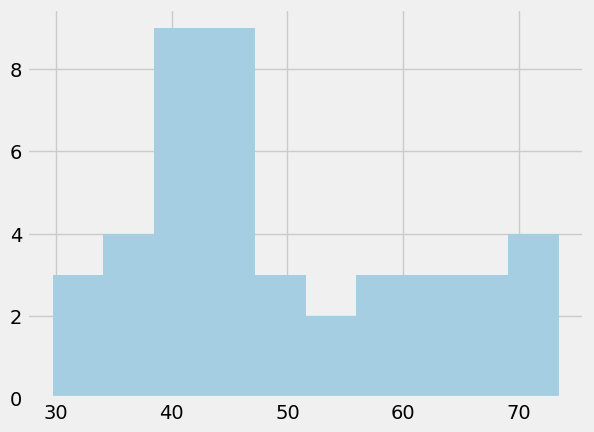

In [32]:
data.loc [error_cut_off_index ] ["winpercent"].hist ()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='winpercent', ylabel='abs_error'>

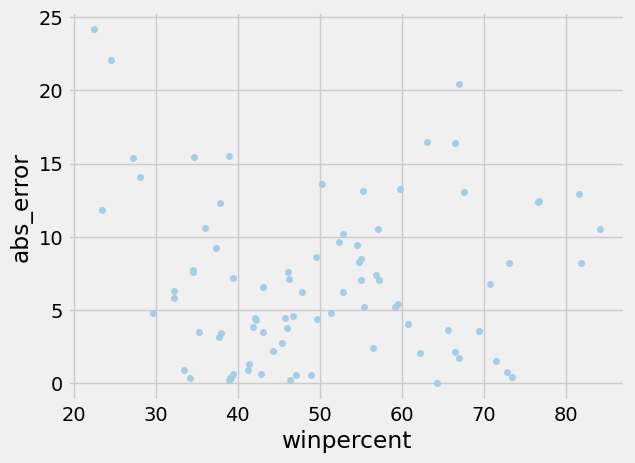

In [33]:
candy_pred.plot.scatter (y_col,"abs_error")

In [34]:
cv_df = pd.DataFrame (random_search.cv_results_)
#cv_df.to_csv ("hyperparams.csv")
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.234694,0.004281,0.009765,0.000131,9,52,94,114,"{'max_depth': 9, 'min_samples_leaf': 52, 'min_...",-0.146128,-0.301292,-0.076185,-0.174535,0.094069,9
1,0.237341,0.000980,0.010855,0.001551,5,72,62,120,"{'max_depth': 5, 'min_samples_leaf': 72, 'min_...",-0.150384,-0.302410,-0.065159,-0.172651,0.098129,5
2,0.354052,0.011151,0.013327,0.000932,9,83,88,174,"{'max_depth': 9, 'min_samples_leaf': 83, 'min_...",-0.150221,-0.299423,-0.071455,-0.173700,0.094537,7
3,0.204659,0.003634,0.008966,0.000568,5,88,25,102,"{'max_depth': 5, 'min_samples_leaf': 88, 'min_...",-0.149881,-0.330894,-0.072840,-0.184538,0.108163,42
4,0.384104,0.002787,0.013576,0.000676,8,53,3,187,"{'max_depth': 8, 'min_samples_leaf': 53, 'min_...",-0.139827,-0.315732,-0.071795,-0.175785,0.102782,15
5,0.200859,0.004324,0.009210,0.000384,6,30,39,101,"{'max_depth': 6, 'min_samples_leaf': 30, 'min_...",-0.150695,-0.310802,-0.064935,-0.175478,0.101893,14
6,0.353504,0.011995,0.012512,0.000097,6,21,34,175,"{'max_depth': 6, 'min_samples_leaf': 21, 'min_...",-0.139391,-0.322807,-0.067625,-0.176608,0.107450,17
7,0.301963,0.005394,0.011397,0.000364,4,22,90,148,"{'max_depth': 4, 'min_samples_leaf': 22, 'min_...",-0.168272,-0.310979,-0.064822,-0.181358,0.100918,36
8,0.392816,0.017717,0.013499,0.000887,5,59,43,191,"{'max_depth': 5, 'min_samples_leaf': 59, 'min_...",-0.150941,-0.310529,-0.074959,-0.178810,0.098169,27
9,0.379024,0.022324,0.011819,0.000087,6,80,16,161,"{'max_depth': 6, 'min_samples_leaf': 80, 'min_...",-0.158403,-0.324054,-0.055443,-0.179300,0.110651,30


In [35]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [36]:
param_dist.keys()

dict_keys(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'])

In [37]:
best_params

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

In [38]:
from sklearn.linear_model import LinearRegression

hyper_modelparam_features = ["param_" + p for p in  list (param_dist.keys())]
print (hyper_modelparam_features)
hyper_X                   = cv_df [hyper_modelparam_features]
hyper_y_name              = "rank_test_score"
hyper_y                   = cv_df [hyper_y_name ]

hyper_model               = LinearRegression ()
hyper_model.fit (hyper_X,hyper_y)

print ("hyper_model.score (hyper_X,hyper_y)", hyper_model.score (hyper_X,hyper_y))

hyper_y_pred             = hyper_model.predict (hyper_X)
hyper_df                 = (hyper_X.join (hyper_y)).join (pd.DataFrame (hyper_y_pred,columns = ["hyper_y_pred"]))
hyper_df.sort_values ("rank_test_score")

['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
hyper_model.score (hyper_X,hyper_y) 0.09255667788605704


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,rank_test_score,hyper_y_pred
19,153,6,7,2,1,20.075230
47,127,3,29,6,2,29.029332
20,192,4,55,4,3,26.843762
31,140,5,6,33,4,24.077968
1,120,5,62,72,5,30.838896
34,187,9,63,23,6,17.987898
2,174,9,88,83,7,23.298148
12,120,7,8,51,8,21.505884
0,114,9,94,52,9,23.930147
33,147,6,34,34,10,23.900879


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='rank_test_score', ylabel='hyper_y_pred'>

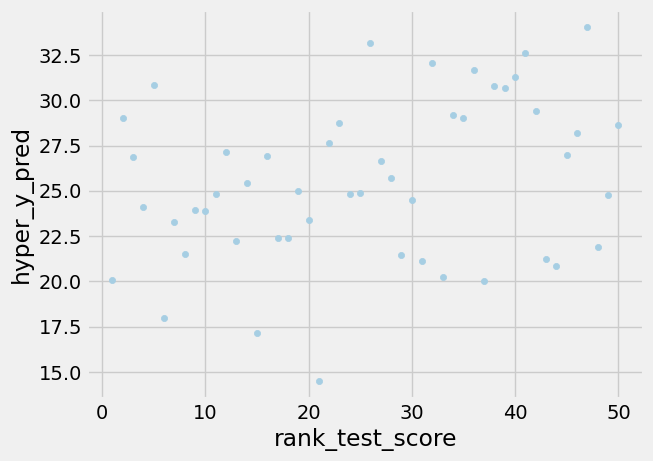

In [39]:
hyper_df.plot.scatter (hyper_y_name , "hyper_y_pred")

In [40]:
hyper_model.feature_names_in_

array(['param_n_estimators', 'param_max_depth', 'param_min_samples_split',
       'param_min_samples_leaf'], dtype=object)

In [41]:
#negative is better : rank
for  p,c in zip ( hyper_model.feature_names_in_ , hyper_model.coef_):print (p,c)

#param_min_samples_leaf -4.9405210916852935  , increase  param_min_samples_leaf
#param_min_samples_split -2.3606866063768948 , increase  param_min_samples_split

param_n_estimators -0.029414815257189794
param_max_depth -2.113930308465385
param_min_samples_split 0.07470501285444264
param_min_samples_leaf 0.05100386977599691


In [42]:
from sklearn.linear_model import LinearRegression

hyper_modelparam_features = ["param_" + p for p in  list (param_dist.keys())]
print (hyper_modelparam_features)
hyper_X                   = cv_df [hyper_modelparam_features]
hyper_y_name              = "mean_fit_time"
hyper_y                   = cv_df [hyper_y_name ]

hyper_model               = LinearRegression ()
hyper_model.fit (hyper_X,hyper_y)

print ("hyper_model.score (hyper_X,hyper_y)", hyper_model.score (hyper_X,hyper_y))

hyper_y_pred             = hyper_model.predict (hyper_X)
hyper_df                 = (hyper_X.join (hyper_y)).join (pd.DataFrame (hyper_y_pred,columns = ["hyper_y_pred"]))
hyper_df.sort_values ("mean_fit_time")

['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
hyper_model.score (hyper_X,hyper_y) 0.5005226960013087


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_fit_time,hyper_y_pred
5,101,6,39,30,0.200859,0.226657
37,102,7,79,47,0.203953,0.216887
3,102,5,25,88,0.204659,0.241166
11,102,6,65,55,0.207580,0.221211
23,114,8,49,95,0.228179,0.267987
0,114,9,94,52,0.234694,0.244199
1,120,5,62,72,0.237341,0.262220
12,120,7,8,51,0.238142,0.289538
13,103,3,19,39,0.240929,0.231844
45,127,9,87,59,0.250214,0.277474


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='mean_fit_time', ylabel='hyper_y_pred'>

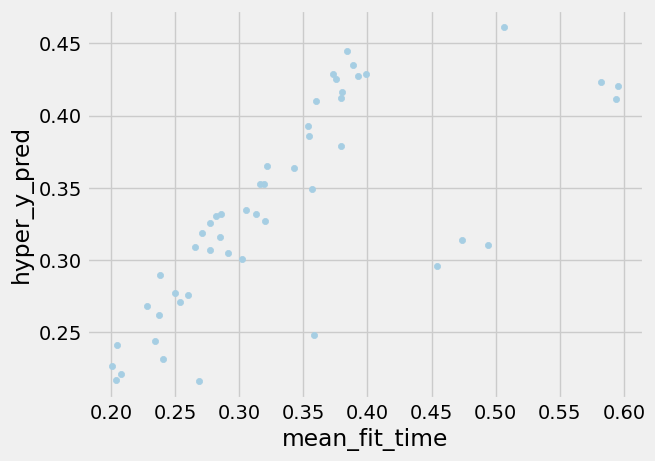

In [43]:
hyper_df.plot.scatter (hyper_y_name , "hyper_y_pred")

In [44]:
for  p,c in zip ( hyper_model.feature_names_in_ , hyper_model.coef_):print (p,c)
#more is worse , more time

param_n_estimators 0.002232552176524977
param_max_depth 0.003225177433588896
param_min_samples_split -0.0004482896212427362
param_min_samples_leaf 0.00015907055414206327


In [45]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning, message='.*SettingWithCopyWarning.*')


In [46]:
#error_cut_off_index
ate_best_params = {'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

outcome_var = y_col
outcome_var2 = "pricepercent"
outcome_var3 = "sugarpercent"


<Axes: >

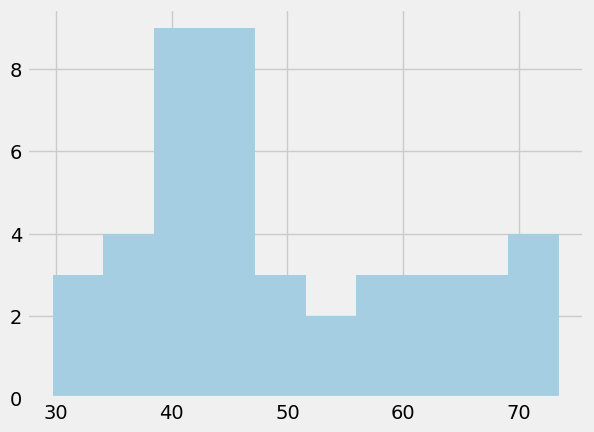

In [47]:
data.loc [error_cut_off_index ] ["winpercent"].hist ()

<Axes: >

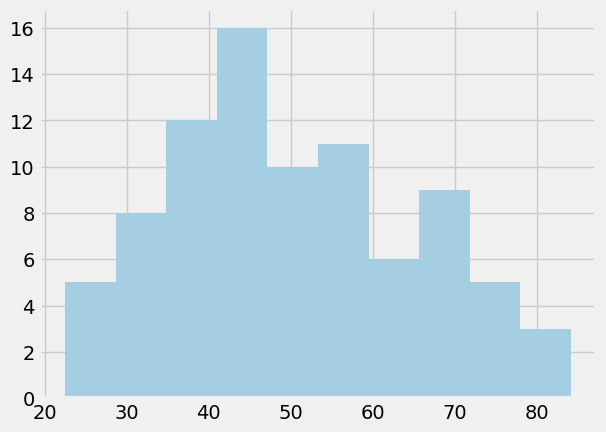

In [48]:
data["winpercent"].hist ()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='winpercent', ylabel='y_pred'>

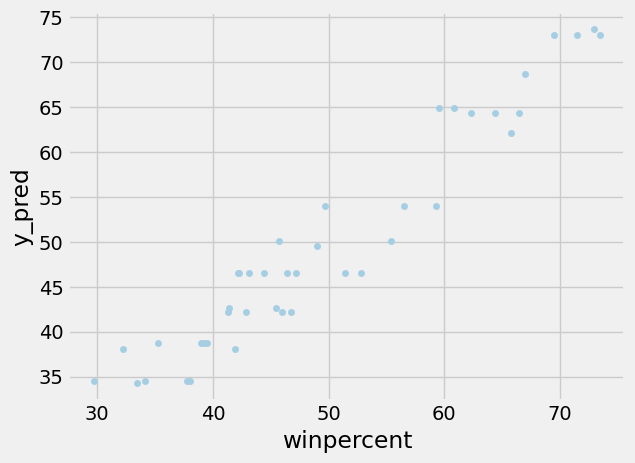

In [49]:
candy_pred.loc [error_cut_off_index ].plot.scatter (y_col,"y_pred")

In [81]:
random_search.score (X.loc [error_cut_off_index ] , y.loc [error_cut_off_index ])

0.9263970280879417

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def t_learner(data, treatment_col, outcome_col):
    # Splitting the dataset into treatment and control groups
    treatment_data = data[data[treatment_col] == 1]
    control_data = data[data[treatment_col] == 0]

    X_treatment = treatment_data.drop([treatment_col, outcome_col], axis=1)
    y_treatment = treatment_data[outcome_col]

    X_control = control_data.drop([treatment_col, outcome_col], axis=1)
    y_control = control_data[outcome_col]

    # Define models for treatment and control (using RandomForest for example)
    model_treatment = RandomForestRegressor(**ate_best_params )
    model_control = RandomForestRegressor(**ate_best_params )

    # Train both models
    model_treatment.fit(X_treatment, y_treatment)
    model_control.fit(X_control, y_control)

    # Predict outcomes for the whole dataset with both models
    data_without_treatment_outcome = data.drop([treatment_col, outcome_col], axis=1)
    pred_treatment = model_treatment.predict(data_without_treatment_outcome)
    pred_control = model_control.predict(data_without_treatment_outcome)

    # Calculate ATE as the average difference between predicted outcomes
    ate = np.mean(pred_treatment - pred_control)

    return ate

# Usage example
# ate = t_learner(df, 'treatment', 'y')
# print(f"Estimated ATE: {ate}")


In [51]:
import pandas as pd
import statsmodels.api as sm

def estimate_ate_recursive(data, outcome_var):
    """
    Estimate ATE recursively for each variable in the dataset, treating each as a treatment
    and the others as confounders.

    Parameters:
    - data: Pandas DataFrame containing the outcome variable and potential treatments/confounders.
    - outcome_var: The name of the outcome variable (y).

    Returns:
    A dictionary with variable names as keys and their estimated ATEs as values.
    """
    ate_estimates = {}
    variables = [col for col in data.columns if col != outcome_var]

    for treatment_var in variables:
        # Define the treatment and confounders
        confounders = [col for col in variables if col != treatment_var]

        # Prepare the model data
        X = data[confounders]
        data_tv  = data [treatment_var].values
        X.loc[:, treatment_var] = data_tv
        #X = sm.add_constant(X)  # Adds a constant term to the predictors
        y = data[outcome_var]

        # Fit the model
        #model = sm.OLS(y, X).fit()

        # Estimate ATE as the coefficient of the treatment variable
        #ate_estimates[treatment_var] = model.params[treatment_var]
        ate_estimates[treatment_var] = t_learner(data, treatment_var, outcome_var)

    return ate_estimates

# Example usage (assuming `df` is your DataFrame and 'y' is the outcome variable):
# ate_estimates = estimate_ate_recursive(df, 'y')
# print(ate_estimates)


In [52]:
data.loc [error_cut_off_index ]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924
16,Fun Dip,0,1,0,0,0,0,1,0,0,0.732,0.325,39.185505
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
20,Haribo Sour Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,51.412430
21,Haribo Twin Snakes,0,1,0,0,0,0,0,0,1,0.465,0.465,42.178772


In [53]:
X.loc [error_cut_off_index ].corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,1.000000,-0.658668,0.224562,0.448596,0.190826,0.396059,-0.397048,0.636274,-0.294959
fruity,-0.658668,1.000000,-0.445823,-0.338255,-0.143889,-0.298641,0.459307,-0.479770,0.121739
caramel,0.224562,-0.445823,1.000000,0.013007,0.322749,0.258376,-0.164220,0.341633,-0.273066
peanutyalmondy,0.448596,-0.338255,0.013007,1.000000,-0.055972,0.133595,-0.225685,-0.008295,0.047356
nougat,0.190826,-0.143889,0.322749,-0.055972,1.000000,-0.049417,-0.096003,0.299912,-0.165472
crispedricewafer,0.396059,-0.298641,0.258376,0.133595,-0.049417,1.000000,-0.199254,0.622466,-0.343437
hard,-0.397048,0.459307,-0.164220,-0.225685,-0.096003,-0.199254,1.000000,-0.320104,-0.147462
bar,0.636274,-0.479770,0.341633,-0.008295,0.299912,0.622466,-0.320104,1.000000,-0.551735
pluribus,-0.294959,0.121739,-0.273066,0.047356,-0.165472,-0.343437,-0.147462,-0.551735,1.000000


In [54]:
estimate_ate_recursive(X.join(y).loc [error_cut_off_index ], outcome_var)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 19.18906108257115,
 'fruity': -2.16424212701807,
 'caramel': 3.766465727643894,
 'peanutyalmondy': 21.770920232208994,
 'nougat': 11.407029381191592,
 'crispedricewafer': 14.952252149842316,
 'hard': -10.289788803233199,
 'bar': 11.468894517609728,
 'pluribus': 1.8195640762120562}

In [55]:
estimate_ate_recursive(X.join(data [outcome_var2]).loc [error_cut_off_index ], outcome_var2)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 0.22603987192253988,
 'fruity': -0.12423121489150189,
 'caramel': 0.2256783874822735,
 'peanutyalmondy': 0.2454099422635159,
 'nougat': 0.0010684045498029649,
 'crispedricewafer': 0.3720968028327674,
 'hard': -0.11854019866938015,
 'bar': 0.37277323472184154,
 'pluribus': -0.034988713622532475}

In [56]:
estimate_ate_recursive(X.join(data [outcome_var3]).loc [error_cut_off_index ], outcome_var3)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 0.02460057812152296,
 'fruity': -0.10205906339708401,
 'caramel': 0.2134622593425166,
 'peanutyalmondy': 0.1930795166495672,
 'nougat': 0.21148197089680454,
 'crispedricewafer': -0.005082669755860776,
 'hard': 0.08902517986698513,
 'bar': 0.052312449115963604,
 'pluribus': 0.0619987822126755}

In [57]:
ate_win   = estimate_ate_recursive(X.join(y).loc [error_cut_off_index ], outcome_var)
ate_price = estimate_ate_recursive(X.join(data [outcome_var2]).loc [error_cut_off_index ], outcome_var2)
ate_sugar = estimate_ate_recursive(X.join(data [outcome_var3]).loc [error_cut_off_index ], outcome_var3)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [58]:
ate_win

{'chocolate': 18.738549003316756,
 'fruity': -1.8412884874910744,
 'caramel': 3.402902347344053,
 'peanutyalmondy': 21.789864260719654,
 'nougat': 11.436935805124495,
 'crispedricewafer': 14.882715635721054,
 'hard': -10.129713292239705,
 'bar': 12.005950148054113,
 'pluribus': 2.23396106699739}

In [59]:
ate_price

{'chocolate': 0.23020325467012864,
 'fruity': -0.13197922419517985,
 'caramel': 0.2226261028341276,
 'peanutyalmondy': 0.2558972628820354,
 'nougat': 0.005375783030775114,
 'crispedricewafer': 0.3799082250233955,
 'hard': -0.10295959298401008,
 'bar': 0.38772699552392476,
 'pluribus': -0.03961571898898222}

In [60]:
ate_sugar

{'chocolate': 0.03519701011433705,
 'fruity': -0.09472016164716437,
 'caramel': 0.2105046006475279,
 'peanutyalmondy': 0.1975316093175674,
 'nougat': 0.2124955702747266,
 'crispedricewafer': -0.021577953652085223,
 'hard': 0.07160256365640069,
 'bar': 0.03197620125941398,
 'pluribus': 0.08221169560057695}

In [61]:
type (ate_win)

dict

In [62]:
control_variables_df = pd.concat ( [pd.Series (ate_win) ,
             pd.Series (ate_price) ,
             pd.Series (ate_sugar)] ,axis =1 )
control_variables_df = control_variables_df.rename ( {0 : "percentwin_ate" ,
                                                      1 : "perccentprice_ate",
                                                      2 : "percentsugar_ate"},axis =1 )
control_variables_df

,percentwin_ate,perccentprice_ate,percentsugar_ate
chocolate,18.738549,0.230203,0.035197
fruity,-1.841288,-0.131979,-0.094720
caramel,3.402902,0.222626,0.210505
peanutyalmondy,21.789864,0.255897,0.197532
nougat,11.436936,0.005376,0.212496
crispedricewafer,14.882716,0.379908,-0.021578
hard,-10.129713,-0.102960,0.071603
bar,12.005950,0.387727,0.031976
pluribus,2.233961,-0.039616,0.082212


In [67]:
control_variables_df.to_csv ("control_variables_ate_df.csv")
#X.join([data [outcome_var] , data [outcome_var2] , data [outcome_var3]]).loc [error_cut_off_index ].to_csv ("predictable_data.csv")

In [64]:
control_variables_df.corr ()

,percentwin_ate,perccentprice_ate,percentsugar_ate
percentwin_ate,1.000000,0.740588,0.218592
perccentprice_ate,0.740588,1.000000,0.087863
percentsugar_ate,0.218592,0.087863,1.000000


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='percentwin_ate', ylabel='perccentprice_ate'>

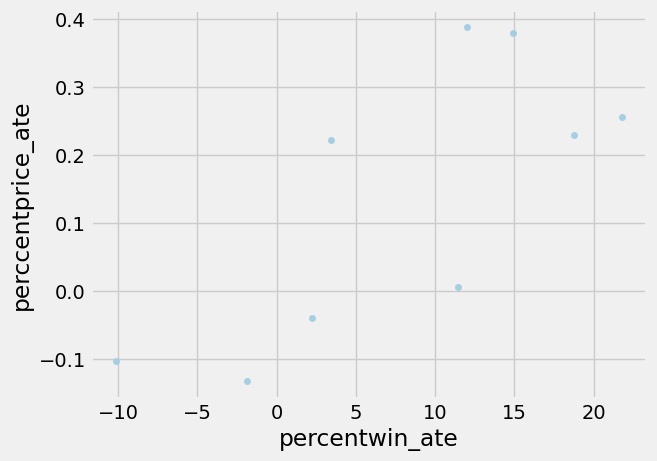

In [71]:
control_variables_df.plot.scatter("percentwin_ate" , "perccentprice_ate")

<Axes: xlabel='percentwin_ate', ylabel='percentsugar_ate'>

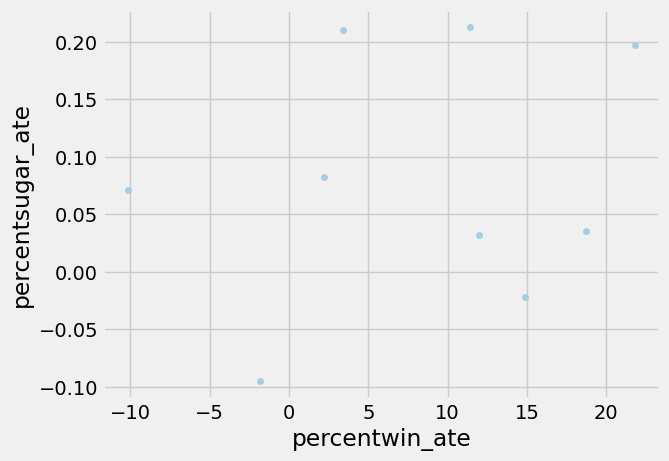

In [73]:
control_variables_df.plot.scatter("percentwin_ate" , "percentsugar_ate")

<Axes: xlabel='percentsugar_ate', ylabel='perccentprice_ate'>

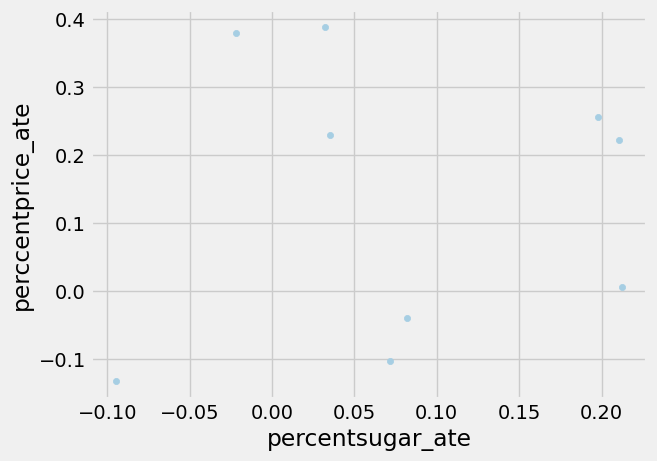

In [74]:
control_variables_df.plot.scatter("percentsugar_ate" , "perccentprice_ate")

In [75]:
from scipy.optimize import linprog

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/control_variables_ate_df.csv')

# Display the first few rows of the DataFrame to understand its structure
df.head()


# Objective function coefficients (we want to maximize percentwin_ate, which in linprog is done by minimizing the negative)
c = -df['percentwin_ate'].values

# Inequality constraints matrix (for perccentprice_ate and percentsugar_ate to be under 0.1 and 0.05, respectively)
A = df[['perccentprice_ate', 'percentsugar_ate']].values
# The bounds for each row in A (perccentprice_ate <= 0.1 and percentsugar_ate <= 0.05)
b = [0.5, 0.5]

# We have two constraints, each applied to all variables: one for price and one for sugar. We need to transpose A to match scipy's expectations
A_ub = A.T

# Bounds for each variable (0 <= x <= 1, indicating whether to include each candy type/attribute or not, considering it as a binary decision variable)
x_bounds = [(0, 1) for _ in range(len(c))]

# Since linprog does not support integer programming directly, we solve the LP relaxation (the continuous version)
result = linprog(c, A_ub=A_ub, b_ub=b, bounds=x_bounds, method='highs')

result


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -59.41407982787877
              x: [ 1.000e+00  1.000e+00  0.000e+00  1.000e+00  1.000e+00
                   4.741e-01  0.000e+00  0.000e+00  1.000e+00]
            nit: 1
          lower:  residual: [ 1.000e+00  1.000e+00  0.000e+00  1.000e+00
                              1.000e+00  4.741e-01  0.000e+00  0.000e+00
                              1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  5.318e+00  0.000e+00
                              0.000e+00  0.000e+00  6.096e+00  3.183e+00
                              0.000e+00]
          upper:  residual: [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00
                              0.000e+00  5.259e-01  1.000e+00  1.000e+00
                              0.000e+00]
                 marginals: [-9.720e+00 -3.329e+00  0.000e+00 -1.177e+01
                             -1.123e+01  0.000e+00  0

In [76]:
# Extracting the names of the selected candies and their proportions
selected_candies     = df['Unnamed: 0'][result.x > 0].tolist()
selected_proportions = result.x[result.x > 0].tolist()

selected_candies, selected_proportions


(['chocolate',
  'fruity',
  'peanutyalmondy',
  'nougat',
  'crispedricewafer',
  'pluribus'],
 [1.0, 1.0, 1.0, 1.0, 0.4741109318971203, 1.0])

In [77]:
# Calculating the actual values for price and sugar constraints achieved by the optimization
actual_price_ate = sum(A_ub[0] * result.x)
actual_sugar_ate = sum(A_ub[1] * result.x)

actual_price_ate, actual_sugar_ate


(0.5, 0.4224853799456206)

In [78]:
result.x

array([1.        , 1.        , 0.        , 1.        , 1.        ,
       0.47411093, 0.        , 0.        , 1.        ])

In [79]:
A_ub[0]

array([ 0.23020325, -0.13197922,  0.2226261 ,  0.25589726,  0.00537578,
        0.37990823, -0.10295959,  0.387727  , -0.03961572])